In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

## Create random data from specific stats

https://stats.stackexchange.com/questions/469311/how-to-calculate-mean-and-sd-of-lognormal-distribution-based-on-meanlog-an

https://stackoverflow.com/questions/68361048/how-to-generate-lognormal-distribution-with-specific-mean-and-std-in-python

https://stackoverflow.com/questions/72114379/transforming-a-lognormal-mean-and-sd-into-normal-mean-and-sd

https://www.wikiwand.com/en/Log-normal_distribution

Take a look at this: https://stats.stackexchange.com/questions/572987/convert-from-log-normal-distribution-to-normal-distribution

And also: https://stats.stackexchange.com/questions/158123/lognormal-distribution-using-normal-distribution-inputs

### From Peter's code (SIMCAT)

'Generate log normal random deviate [check with SIMCAT manual]

LGST = (Log(1 + (SD ^ 2) / (Mean ^ 2))) ^ 0.5

LGMean = Log(Mean / ((1 + ((SD ^ 2) / (Mean ^ 2))) ^ 0.5))

## Calculate 'normal' meand and std

In [49]:
lg_mean = 100
lg_sd = 93

In [50]:
# https://en.wikipedia.org/wiki/Method_of_moments_(statistics)
# and
# https://stats.stackexchange.com/questions/95498/how-to-calculate-log-normal-parameters-using-the-mean-and-std-of-the-given-distr
mean = np.log(lg_mean / ((1 + ((lg_sd**2) / (lg_mean**2))) ** 0.5))
sd = (np.log(1 + (lg_sd**2) / (lg_mean**2))) ** 0.5

In [51]:
dist = np.random.lognormal(mean, sd, 100000)

<Axes: xlabel='0', ylabel='Count'>

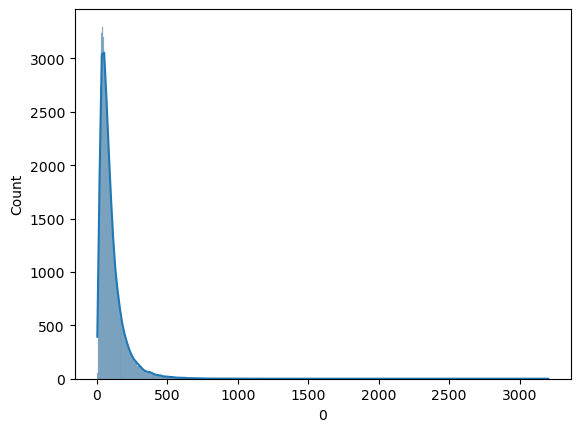

In [52]:
sns.histplot(data=pd.DataFrame(dist), x=0, kde=True)

### 5th percentile can be converted directly

In [53]:
np.quantile(dist, q=0.05)

19.97279368994311

In [54]:
dist.mean(), dist.std()

(99.97418983295725, 93.48821563165362)

In [55]:
# https://stats.stackexchange.com/questions/586114/percentile-of-the-arithmetic-mean-of-a-lognormal-distribution
from scipy.stats import norm

norm.ppf(0.05, loc=mean, scale=sd)

2.995061641497374

In [56]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html#scipy.stats.lognorm
from scipy.stats import lognorm

lg_05 = lognorm.ppf(0.05, s=sd, scale=np.exp(mean))

In [57]:
lg_05

19.986591855336005

In [58]:
np.log(19.9865)

2.9950570456389234

In [59]:
norm_dist = np.random.normal(mean, sd, 100000)
np.quantile(norm_dist, q=0.05)

3.0044609259318347

## Testing LogFCf (black_mc.for)

Standard deviation in log domain

`grfs = SQRT( 2.7057 + 2.*ALOG((rfm + fsh)/(rf5 + fsh))) - 1.6449`

Mean in log domain

`grfm = ALOG (rfm + fsh) - 0.5 * grfs * grfs`

Compute standard deviation of unlogged flows

`rfs = rfm * SQRT ( EXP( grfs * grfs ) - 1.0 )`

In [78]:
sd_2 = (2.7057 + 2 * np.log(lg_mean / lg_05)) ** 0.5 - 1.6469

In [79]:
sd, sd_2

(0.7894348816433585, 0.7874206627273725)

In [82]:
mean_2 = np.log(lg_mean) - 0.5 * sd_2**2

In [83]:
mean, mean_2

(4.293566469810459, 4.295154535943085)

In [76]:
lg_sd_2 = lg_mean * (np.exp(sd_2**2) - 1) ** 0.5

In [77]:
lg_sd, lg_sd_2

(93, 92.63800352084395)